# A Tribute to Liam Payne

### His Journey with One Direction
Liam Payne’s journey began with *X-Factor*, where he became an essential member of One Direction. His voice added depth to hits like *Story of My Life* and *Night Changes*.

### Solo Career and Beyond
Post-1D, Liam shone as a solo artist with hits like *Strip That Down*. His contributions transcend music, inspiring millions worldwide.

### Legacy
Through this notebook, we celebrate Liam’s artistry, passion, and irreplaceable role in our hearts.


-------------------------------------------------------------------------------------------------------------------------------
### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import streamlit as st
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\One_Direction_Proper_Dataset.csv')

### Understanding the Data

In [3]:
df.shape

(95, 7)

In [4]:
df.columns

Index(['S.No.', 'Song', 'Artist(s)', 'Writer(s)', 'Album(s)', 'Year',
       'Lyrics'],
      dtype='object')

In [5]:
df.head()

S.No.             Song      Artist(s)  \
0      1             "18"  One Direction   
1      2           "A.M."  One Direction   
2      3     "Act My Age"  One Direction   
3      4          "Alive"  One Direction   
4      5  "Another World"  One Direction   

                                           Writer(s)           Album(s)  Year  \
0                           Ed Sheeran, Oliver Frank               Four  2014   
1  Niall Horan, Liam Payne, Harry Styles, Louis T...   Made in the A.M.  2015   
2              John Ryan, Julian Bunetta, Ed Drewett               Four  2014   
3  Julian Bunetta, John Ryan, Jamie Scott, Louis ...  Midnight Memories  2013   
4  Achraf Jannusi, Bilal Hajji, Eric Sanicola, Ge...       Up All Night  2011   

                                              Lyrics  
0  [Verse 1: Harry]\nI got a heart and I got a so...  
1  [Intro: Harry]\nWon't you stay till the A.M.?\...  
2  [Intro]\nOne, two, three, four\n\n[Verse 1: Ni...  
3  [Verse 1: Liam]\nMy mother told me I should go...  
4  [Verse 1: Liam]\nIt's not me, it's not you, th...

In [6]:
df.describe(include='all')

S.No.  Song      Artist(s)                              Writer(s)  \
count   95.000000    95             95                                     95   
unique        NaN    95              4                                     85   
top           NaN  "18"  One Direction  Rami Yacoub, Carl Falk, Savan Kotecha   
freq          NaN     1             92                                      6   
mean    48.000000   NaN            NaN                                    NaN   
std     27.568098   NaN            NaN                                    NaN   
min      1.000000   NaN            NaN                                    NaN   
25%     24.500000   NaN            NaN                                    NaN   
50%     48.000000   NaN            NaN                                    NaN   
75%     71.500000   NaN            NaN                                    NaN   
max     95.000000   NaN            NaN                                    NaN   

            Album(s)         Year  \
count             95    95.000000   
unique             7          NaN   
top     Take Me Home          NaN   
freq              20          NaN   
mean             NaN  2012.884211   
std              NaN     1.464932   
min              NaN  2010.000000   
25%              NaN  2012.000000   
50%              NaN  2013.000000   
75%              NaN  2014.000000   
max              NaN  2015.000000   

                                                   Lyrics  
count                                                  95  
unique                                                 95  
top     [Verse 1: Harry]\nI got a heart and I got a so...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [7]:
df.info

<bound method DataFrame.info of     S.No.                         Song  \
0       1                         "18"   
1       2                       "A.M."   
2       3                 "Act My Age"   
3       4                      "Alive"   
4       5              "Another World"   
..    ...                          ...   
90     91  "Where Do Broken Hearts Go"   
91     92      "Why Don't We Go There"   
92     93          "Wishing on a Star"   
93     94                     "Wolves"   
94     95                    "You & I"   

                                            Artist(s)  \
0                                       One Direction   
1                                       One Direction   
2                                       One Direction   
3                                       One Direction   
4                                       One Direction   
..                                                ...   
90                                      One Direction   
91     

In [8]:
df.isna().sum()

S.No.        0
Song         0
Artist(s)    0
Writer(s)    0
Album(s)     0
Year         0
Lyrics       0
dtype: int64

In [9]:
df.isnull().sum()

S.No.        0
Song         0
Artist(s)    0
Writer(s)    0
Album(s)     0
Year         0
Lyrics       0
dtype: int64

In [10]:
df.duplicated().sum()

0

### Getting the Summary of The Data

In [11]:
from summarytools import dfSummary

In [12]:
dfSummary(df)

### Exploratory Data Analysis (EDA)

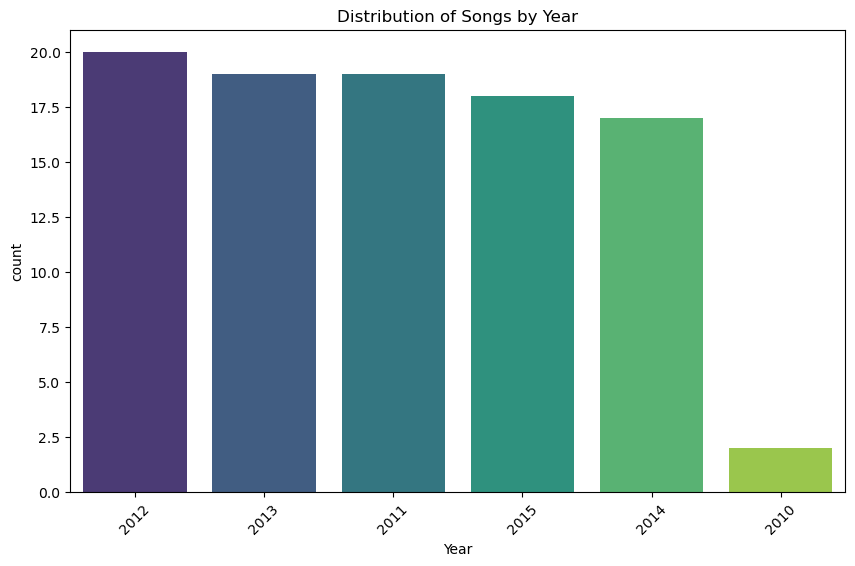

In [13]:
# Distribution of Songs by Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index, palette='viridis')
plt.title('Distribution of Songs by Year')
plt.xticks(rotation=45)
plt.show()

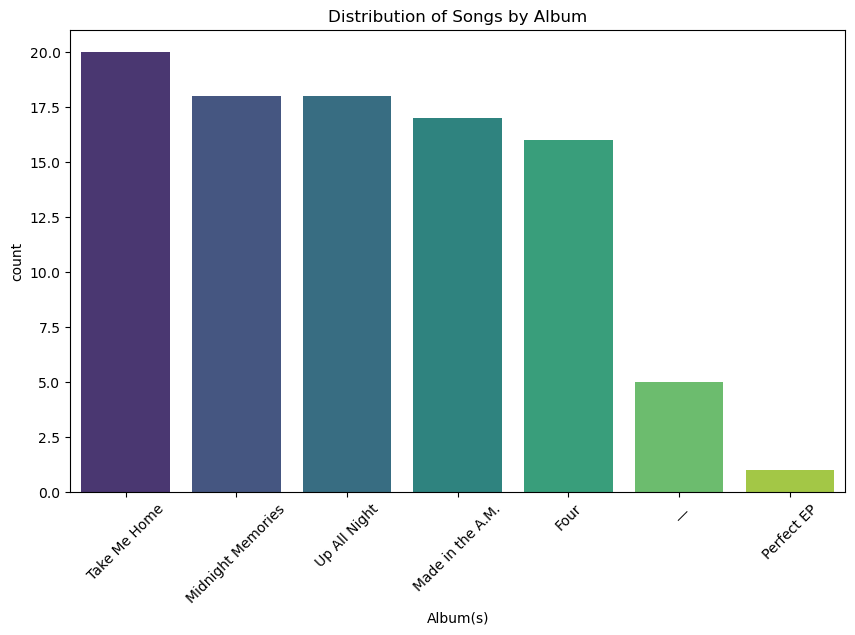

In [14]:
# Distribution of Songs by Album
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Album(s)', order=df['Album(s)'].value_counts().index, palette='viridis')
plt.title("Distribution of Songs by Album")
plt.xticks(rotation=45)
plt.show()

### Word Frequency Analysis

In [15]:
# Analyzing the most common words in the entire dataset's lyrics.
from collections import Counter
all_lyrics = " ".join(df['Lyrics'])
word_counts = Counter(all_lyrics.split())
most_common_words = word_counts.most_common(20)

print("Most Common Words:", most_common_words)

Most Common Words: [('I', 1328), ('you', 1226), ('the', 791), ('me', 541), ('to', 495), ('be', 368), ('it', 337), ('a', 336), ('your', 333), ('my', 324), ('and', 323), ('know', 300), ('we', 299), ("I'm", 278), ('[Chorus:', 273), ("don't", 269), ('And', 267), ('that', 260), ('in', 256), ('all', 251)]


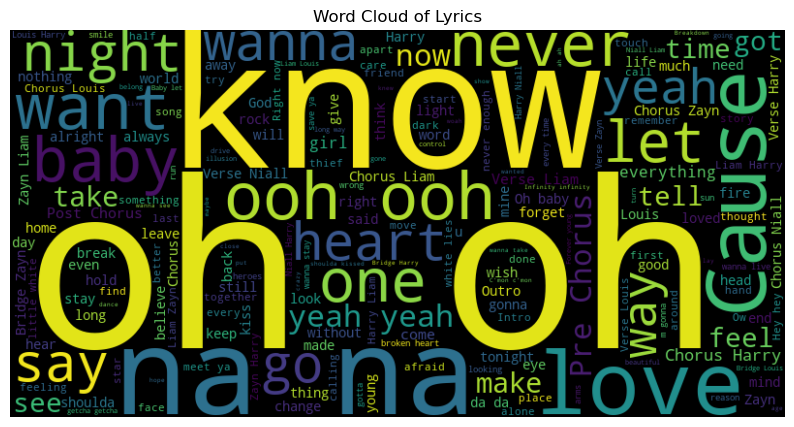

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_lyrics)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()

### Liam Payne-Specific Data Analysis

In [17]:
# Add 'is_liam_vocal' column if missing
if 'is_liam_vocal' not in df.columns:
    # Adjust logic based on your dataset
    if 'singer' in df.columns:
        df['is_liam_vocal'] = df['singer'].str.contains("Liam Payne", na=False)
    else:
        # Temporary fallback logic
        df['is_liam_vocal'] = True 

# Filter for Liam Payne's songs
liam_songs = df[df['is_liam_vocal'] == True]
print("Liam Payne's songs:", liam_songs)

Liam Payne's songs:     S.No.                         Song  \
0       1                         "18"   
1       2                       "A.M."   
2       3                 "Act My Age"   
3       4                      "Alive"   
4       5              "Another World"   
..    ...                          ...   
90     91  "Where Do Broken Hearts Go"   
91     92      "Why Don't We Go There"   
92     93          "Wishing on a Star"   
93     94                     "Wolves"   
94     95                    "You & I"   

                                            Artist(s)  \
0                                       One Direction   
1                                       One Direction   
2                                       One Direction   
3                                       One Direction   
4                                       One Direction   
..                                                ...   
90                                      One Direction   
91                 

In [18]:
liam_songs = df[df['is_liam_vocal'] == True]

### Preprocessing Lyrics

In [19]:
import nltk
nltk.download('stopwords')

# This section preprocesses lyrics: removing unwanted characters, lowercasing, and removing stopwords.
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def preprocess_lyrics(lyrics):
    lyrics = re.sub(r"\[.*?\]", "", lyrics)  # Remove annotations like [Verse]
    lyrics = re.sub(r"[^a-zA-Z\s]", "", lyrics)  # Remove special characters
    lyrics = lyrics.lower()  # Convert to lowercase
    tokens = word_tokenize(lyrics)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing to 'df' before filtering for Liam
df['cleaned_lyrics'] = df['Lyrics'].apply(preprocess_lyrics)

# Create Liam-specific DataFrame
if 'is_liam_vocal' not in df.columns:
    if 'singer' in df.columns:
        df['is_liam_vocal'] = df['singer'].str.contains("Liam Payne", na=False)
    else:
        df['is_liam_vocal'] = True  # Placeholder logic

liam_songs = df[df['is_liam_vocal'] == True]

### Sentiment Analysis

In [21]:
# This section performs sentiment analysis on Liam Payne's lyrics.

def analyze_sentiment(lyrics):
    return TextBlob(lyrics).sentiment.polarity

In [22]:
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
liam_songs['sentiment'] = liam_songs['cleaned_lyrics'].apply(analyze_sentiment)
liam_songs['sentiment_category'] = liam_songs['sentiment'].apply(categorize_sentiment)

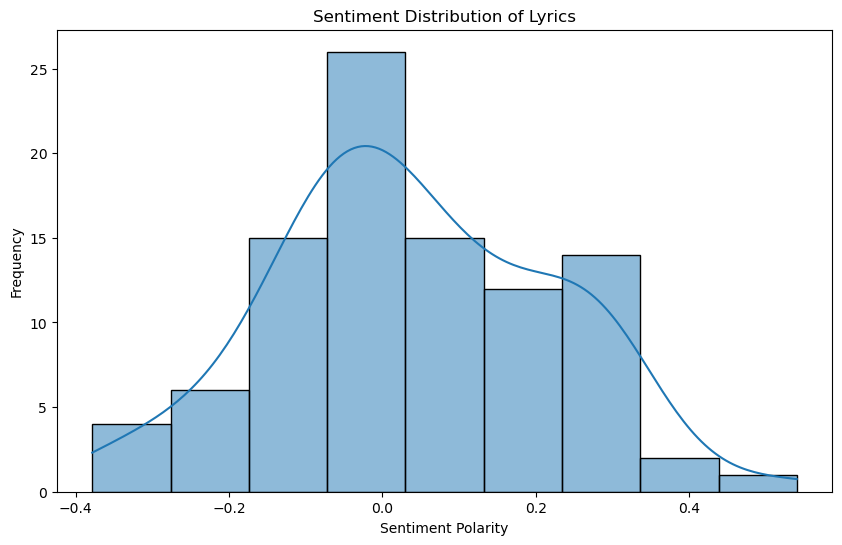

In [24]:
# Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(liam_songs['sentiment'], kde=True, palette='viridis')
plt.title('Sentiment Distribution of Lyrics')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

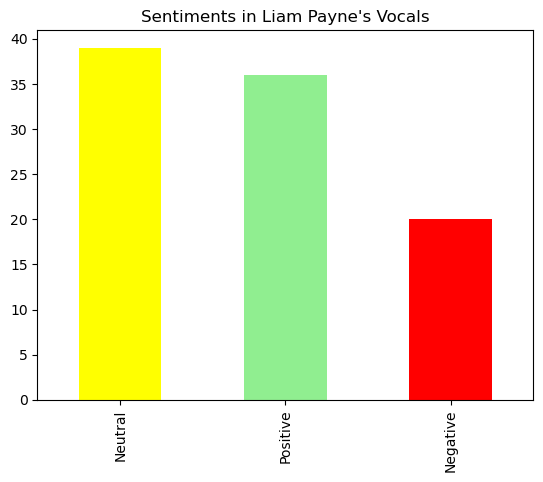

In [25]:
liam_songs['sentiment_category'].value_counts().plot(kind='bar', color=['yellow', 'lightgreen', 'red'])
plt.title("Sentiments in Liam Payne's Vocals")
plt.show()

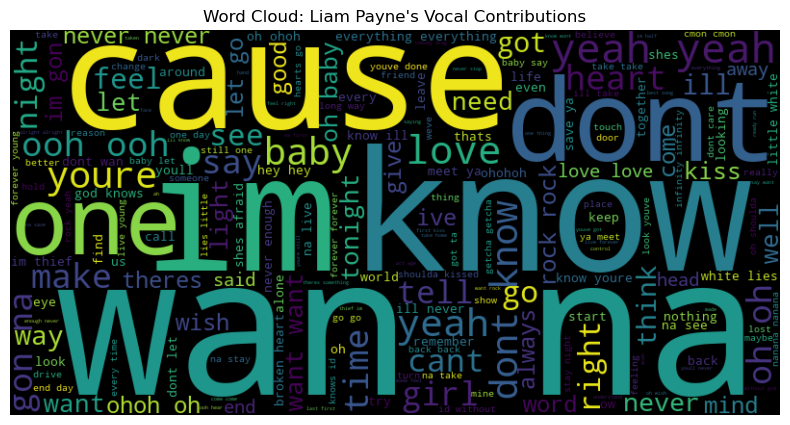

In [26]:
# Generating a word cloud for Liam Payne's vocal contributions.
liam_lyrics = " ".join(liam_songs['cleaned_lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(liam_lyrics)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Liam Payne's Vocal Contributions")
plt.show()

### TF-IDF Analysis

In [27]:
# Identifying distinctive words in Liam Payne's lyrics using TF-IDF.
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(liam_songs['cleaned_lyrics'])
liam_unique_words = vectorizer.get_feature_names_out()

print("Top distinctive words in Liam's songs:", liam_unique_words)

Top distinctive words in Liam's songs: ['baby' 'cause' 'dont' 'got' 'heart' 'ill' 'im' 'know' 'like' 'love' 'na'
 'night' 'oh' 'ooh' 'say' 'wan' 'want' 'way' 'yeah' 'youre']


### Career Milestones

In [28]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame with the provided data
milestones = pd.DataFrame({'Year': [2010, 2011, 2013, 2015, 2017, 2020],
                          'Event': ['Formation of One Direction on X-Factor',
                                    'First Album Release: Up All Night',
                                    'Take Me Home World Tour',
                                    'Band’s Hiatus',
                                    'Liam’s Solo Career Launch',
                                    'Liam’s Chart-Topping Singles']})

# Create a Plotly line chart with markers
fig = go.Figure(data=[go.Scatter(x=milestones['Year'], y=milestones['Event'], mode='lines+markers')])

# Set chart title and axis labels
fig.update_layout(
    title='Liam Payne’s Career Milestones',
    xaxis_title='Year',
    yaxis_title='Event',
    hovermode='x unified'  # Display hover data for all traces at the same x-coordinate
)

# Display the chart
fig.show()

### Sentiment Analysis by Album

In [29]:
# Analyzing the average sentiment of Liam Payne's vocals by album.
liam_sentiment_album = liam_songs.groupby('Album(s)').sentiment.mean().reset_index()

fig_sentiment = px.bar(
    liam_sentiment_album, x='Album(s)', y='sentiment', color='Album(s)',
    title="Average Sentiment of Liam's Vocal Contributions by Album",
    color_discrete_sequence=['yellow', 'lightgreen', 'red']
)
fig_sentiment.show()

### LSTM Model for Lyric Generation

In [30]:
# Building and training an LSTM model to generate Liam Payne-inspired lyrics.
tokenizer = Tokenizer()
liam_lyrics_list = liam_songs['cleaned_lyrics'].tolist()
tokenizer.fit_on_texts(liam_lyrics_list)

In [31]:
# Prepare Sequences for LSTM
sequences = tokenizer.texts_to_sequences(liam_lyrics_list)
vocab_size = len(tokenizer.word_index) + 1

In [32]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         152400    
                                                                 
 lstm (LSTM)                 (None, None, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1524)              196596    
                                                                 
Total params: 597828 (2.28 MB)
Trainable params: 597828 (2.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Generate Liam-Inspired Lyrics
# This function uses the trained LSTM model to generate lyrics based on a seed text.
def generate_lyrics(model, tokenizer, seed_text, max_length=50):
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([seed_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length, padding='pre')
        predicted = model.predict(sequence, verbose=0).argmax()
        word = tokenizer.index_word.get(predicted, '')
        seed_text += ' ' + word
    return seed_text

seed_text = "Through the fire"
print("Generated lyrics (Liam-themed):", generate_lyrics(model, tokenizer, seed_text))

Generated lyrics (Liam-themed): Through the fire madly madly madly madly madly madly madly blinded blinded put lean anyone anyone anyone love love love explain fit ha breaking cold fate fate fate fate foresee foresee foresee foresee foresee foresee foresee hour hour spine expensive expensive idolizing idolizing idolizing talkin water water swim confused confused confused confused meanin


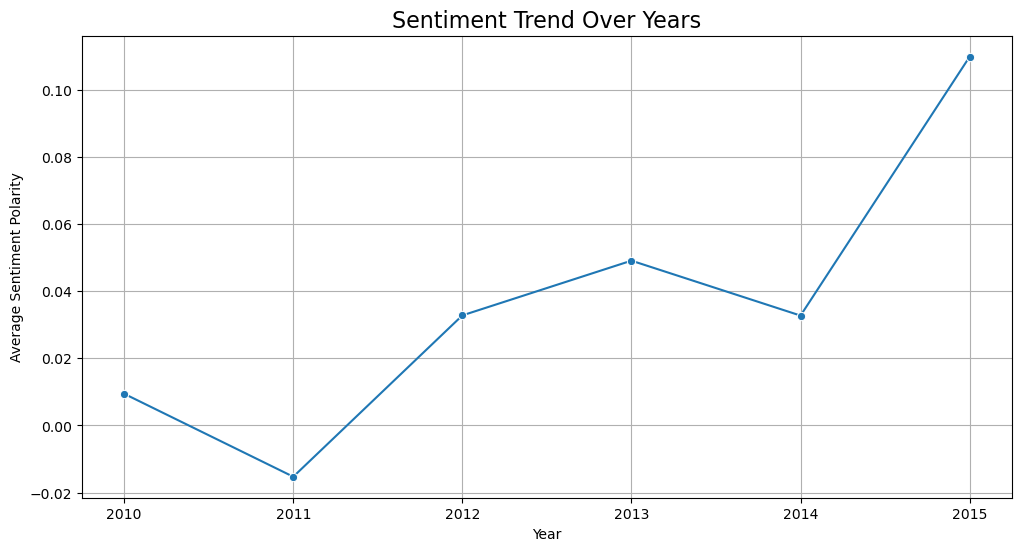

In [35]:
sentiment_by_year = liam_songs.groupby('Year').sentiment.mean().reset_index()

# Create a line plot for sentiment trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_by_year, x='Year', y='sentiment', marker='o', ci=None)
plt.title("Sentiment Trend Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Sentiment Polarity")
plt.grid()
plt.show()

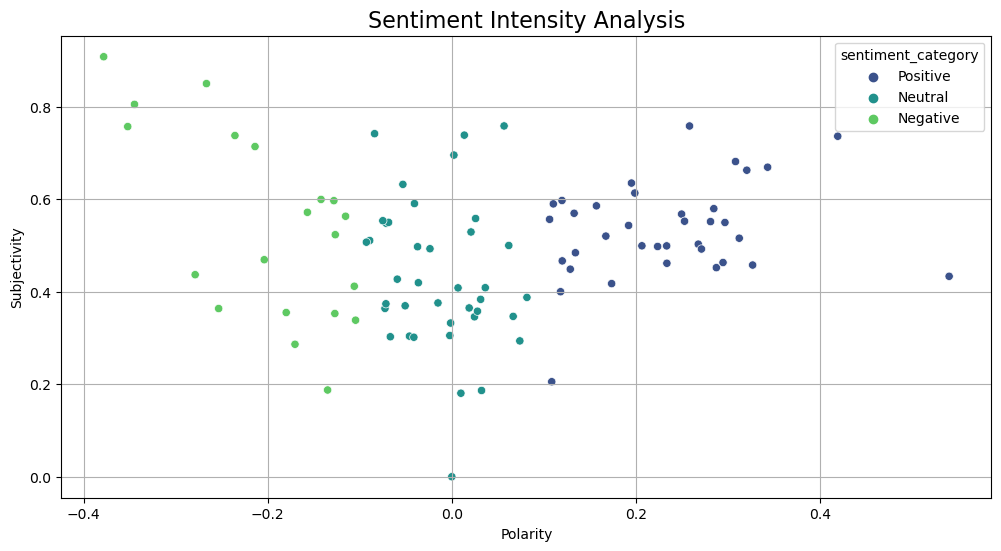

In [36]:
def analyze_sentiment_intensity(lyrics):
    blob = TextBlob(lyrics)
    return {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    }

liam_songs['sentiment_intensity'] = liam_songs['cleaned_lyrics'].apply(analyze_sentiment_intensity)

# Assuming 'sentiment_intensity' column contains a dictionary with 'polarity' and 'subjectivity'
liam_songs['polarity'] = liam_songs['sentiment_intensity'].apply(lambda x: x['polarity'])
liam_songs['subjectivity'] = liam_songs['sentiment_intensity'].apply(lambda x: x['subjectivity'])

# Visualize sentiment intensity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=liam_songs, x='polarity', y='subjectivity', hue='sentiment_category', palette='viridis')
plt.title("Sentiment Intensity Analysis", fontsize=16)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [37]:
# TF-IDF to Identify Distinctive Words in Liam's Songs
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(liam_songs['Lyrics'])
liam_unique_words = vectorizer.get_feature_names_out()

print("Top distinctive words in Liam's songs:", liam_unique_words)


Top distinctive words in Liam's songs: ['baby' 'cause' 'chorus' 'don' 'harry' 'just' 'know' 'liam' 'like' 'll'
 'love' 'na' 'niall' 'oh' 'ooh' 've' 'verse' 'wanna' 'yeah' 'zayn']


### Conclusion
Liam Payne’s contributions to One Direction and his solo career have been profound, shaping not only the band’s legacy but also his own as a unique artist. Through data analysis, we can uncover patterns in his vocal delivery, lyricism, and evolving fan reception. This tribute not only highlights Liam’s evolution but reveals his undeniable influence on pop music. By diving deep into sentiment analysis, lyric frequency, and career milestones, this project showcases how Liam Payne transitioned from a key member of a global phenomenon to a chart-topping solo artist. His impact is more than just numbers; it’s a testament to the power of artistry, resilience, and transformation in the music industry. With this data-driven journey, we honor his musical journey and the millions of fans who have supported him along the way.